### Задание по статистике

Дан датасет (https://www.kaggle.com/karangadiya/fifa19#data.csv), представляющий из себя детальную аналитику всех игроков FIFA 2019. Необходимо проверить следующие гипотезы с помощью статистических критериев:

- Игровой рейтинг (поле Overall) "левшей" (поле Preferred Foot) больше рейтинга "правшей".
- Средний игровой рейтинг игроков из Аргентины, Англии и Германии (поле Nationality) одинаков. 

Провести первичный анализ данных. Сформулировать нулевую и альтернативную гипотезу. Использовать правильные статистические критерии для проверки гипотез. Каждый шаг должен сопровождаться комментариями (если используете параметрический критерий, обязательно показывать, что его использование допустимо и корректно) и графиками, где это необходимо, должны быть сделаны статистические выводы. 

##### Замечание к выполнению задания

В данном датасете нам представлены данные о всех игроках в FIFA 2019, то есть можно сказать, что нам предоставлена вся генеральная совокупность, но статистические критерии имеет смысл применять на выборках. В то же время, на мой взгляд, было бы глупо работать с выборками, когда нам доступна вся генеральная совокупность. В свзяи с этим, я сделал предположение, что данный датасет есть некоторая выборка из какой-либо генеральной совокупности, например, из вообще всех профессиональных игроков, для каждого из которых существует аналогичная детальная аналитика. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('data.csv')

Посмотрим на датасет:

In [4]:
df.tail()

Unnamed: 0      ID                Name  Age  \
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
18202   Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
18203    Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
18204  Cambridge United  ...      41.0    32.0           13.0           11.0   
18205   Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
18206   Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

      GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
18202     10.0        13.0        7.0            8.0        9.0          €143K  
18203     10.0         9.0        9.0            5.0       12.0          €113K  
18204      6.0         5.0       10.0            6.0       13.0          €165K  
18205     14.0         6.0       14.0            8.0        9.0          €143K  
18206     10.0        15.0        9.0           12.0        9.0          €165K  

[5 rows x 89 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
df.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [11]:
df['Nationality'].describe()

count       18207
unique        164
top       England
freq         1662
Name: Nationality, dtype: object

In [13]:
df['Preferred Foot'].describe()

count     18159
unique        2
top       Right
freq      13948
Name: Preferred Foot, dtype: object

Сразу отмечу, что данные( игровой рейтинг ) у нас, очевидно, количественные, поэтому я не буду упоминать это требование ниже.

# 1

In [16]:
left_f = df[df['Preferred Foot'] == 'Left']
right_f = df[df['Preferred Foot'] == 'Right']

In [28]:
left_f['Overall'].std(), right_f['Overall'].std() 

(6.5571855179815755, 7.010649734817949)

In [26]:
left_f['Overall'].mean(), right_f['Overall'].mean() 

(66.80147233436239, 66.0833811299111)

In [27]:
left_f['Overall'].median(), right_f['Overall'].median() 

(67.0, 66.0)

Действительно, исходя из средних значений и медиан, имеет смысл проверить гипотезу из задания 1.

Для того, чтобы проверить гипотезу "игровой рейтинг левшей больше рейтинга правшей", в силу несвязанности наших выборок я решил воспользоваться либо параметрическим t-критерием Стьюдента, либо непараметрическим критерием Манна-Уитни.

В обоих этих критериях в качестве нулевой гипотезы H_0 следует взять то, что игровой рейтинг "левшей" равен рейтингу "правшей". Тогда альтернативной гипотезой H_1 будет та, которую нам необходимо проверить. Также так как наша гипотеза не относится к исключительным ситуациям, для которых требуется использование нестандартных значений значимости alpha, то возьмем стандартное alpha=0.05.



*Для того, чтобы воспользоваться данными критериями, а также критерием Шапиро-Уилка и одномерным дисперсионным анализом в п. 2, необходимо, чтобы наблюдения в выборке были независимо и одинаково распределены. Мы можем так считать из-за характера наших данных - рейтинг каждого игрока не зависит от других игроков.

Теперь определим, можем ли мы воспользоваться t-критерием Стьюдента. Для этого осталось проверить две вещи:
    
1) приближенность распределения выборок к нормальному распределению;

1.1) отсутсвие выбросов "по краям";

2) равенство дисперсий выборок.

#### Проверим распределения на нормальность

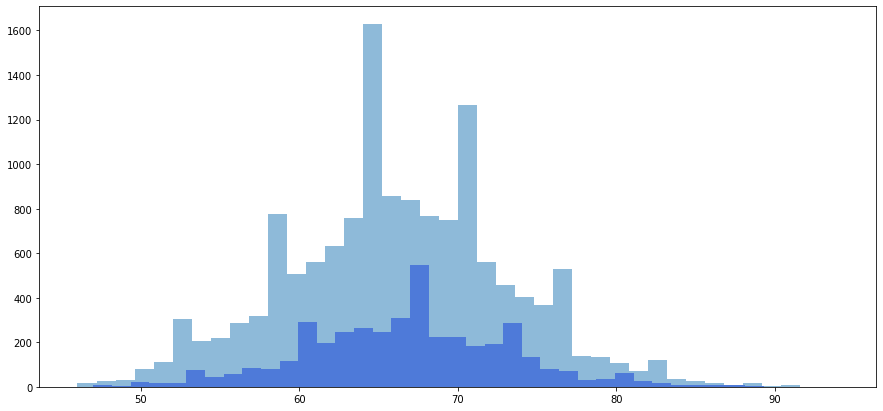

In [17]:
plt.figure(figsize=(15,7))
plt.hist(left_f['Overall'], bins=40, alpha=0.5, color='b')
plt.hist(right_f['Overall'], bins=40, alpha=0.5)
plt.show()

Из графиков сразу можно отметить отсутсвие выбросов.

Очень похоже на нормальное. Проверим, насколько отклонения от него существенны - воспользуемся критерием Шапиро-Уилка:

В данном случае:

H_0 - выборка имеет нормально распределение,

H_1 - выборка не имеет нормальное распределение.

Уровень значимости оставим alpha = 0.05.

In [10]:
stats.shapiro(left_f['Overall'])

ShapiroResult(statistic=0.9953078627586365, pvalue=2.2557736234496417e-10)

In [11]:
stats.shapiro(right_f['Overall'])

ShapiroResult(statistic=0.9967219829559326, pvalue=4.853907084117497e-17)

На основе полученных значений p-value мы вынуждены отклонить нулевые гипотезы о нормальности выборок. Однако, причиной полученного результата является относительно большой объем наших выборок. Действительно, если, учитывая полученные выше гистограммы, мы также посмотрим на квантиль-квантиль график, то увидим, что почти все точки полученного графика лежат на диагонали - это означает, что распределение выборки и нормальное распределение почти одинаковы. 

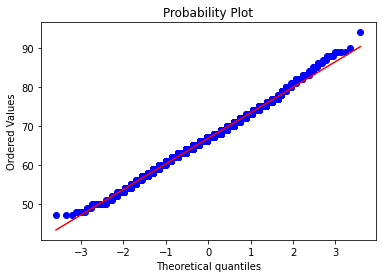

In [12]:
stats.probplot(left_f['Overall'], dist = "norm", plot = plt)
plt.show()

В связи с этим, в силу нестрогого требования равенства распределения выборки нормальному, можно сделать вывод, что это условие применимости t-критерия Стьюдента выполнено.

#### Проверим равенство дисперсий выборок

Для проверки равенства дисперсий воспользуемся критерием Левенье( или тестом Брауна-Форсайта ). Условием его применимости является нормальность распределений - это мы показали выше. Здесь также имеем:

H_0 - дисперсии равны;

H_1 - дисперсии не равны;

alpha=0.05.

In [34]:
stats.levene(left_f['Overall'], right_f['Overall'])

LeveneResult(statistic=31.27527904321503, pvalue=2.271381808572723e-08)

Также попробуем воспользоваться тестом Флигнера-Киллена:

In [14]:
stats.fligner(left_f['Overall'], right_f['Overall'])

FlignerResult(statistic=30.79858112214715, pvalue=2.8624708232959812e-08)

Получили, что следует отклонить гипотезу о равенстве дисперсий. Действительно:

In [15]:
left_f['Overall'].std(), right_f['Overall'].std()

(6.5571855179815755, 7.010649734817949)

#### Применение критерия

Тогда применим критерий Манна-Уитни - для его применения требования выполнены:

In [16]:
stats.mannwhitneyu(left_f['Overall'], right_f['Overall'], alternative = 'greater')

MannwhitneyuResult(statistic=31041762.5, pvalue=9.468043989128382e-09)

#### Статистический вывод

Т.к. полученное p-value=9.46*10^(-9)<0.05=alpha, то нам следует отклонить гипотезу о равенстве рейтинга левшей и правшей в пользу альтернативной гипотезы о том, что рейтинг левшей больше рейтинга правшей. Таким образом, с определенной степенью уверенности можно сделать статистический вывод, что проверяемая гипотеза верна на всей генеральной совокупности, то есть рейтинг левшей больше рейтинга правшей.

# 2

In [20]:
arg_n = df[df['Nationality'] == 'Argentina']
eng_n = df[df['Nationality'] == 'England']
ger_n = df[df['Nationality'] == 'Germany']

In [29]:
arg_n['Overall'].mean(), eng_n['Overall'].mean(), ger_n['Overall'].mean()

(68.57203842049093, 63.42960288808664, 66.08681135225376)

Похоже, имеет смысл проверить и эту гипотезу - возможно она не верна. 

В силу независимости наших выборок, наилучший критерий для проверки равенства средних - параметрический критерией одномерного (межгруппового) дисперсионного анализа. Гипотезы в этом случае будут следующими:

H_0 - Средний игровой рейтинг игроков из Аргентины, Англии и Германии одинаков;

H_1 - Средний игровой рейтинг игроков из Аргентины, Англии и Германии не одинаков.

Уровень значимости alpha=0.05 оставим прежним.

Необходимыми условиями использования данного критерия как и в случае с t-критерием Стьюдента являются:
    
1) приближенность распределения выборок к нормальному распределению;

1.1) отсутсвие выбросов "по краям";

2) равенство дисперсий выборок.

#### Проверим на нормальность

Аналогично пункту 1 проверим распределения на нормальность:

[]

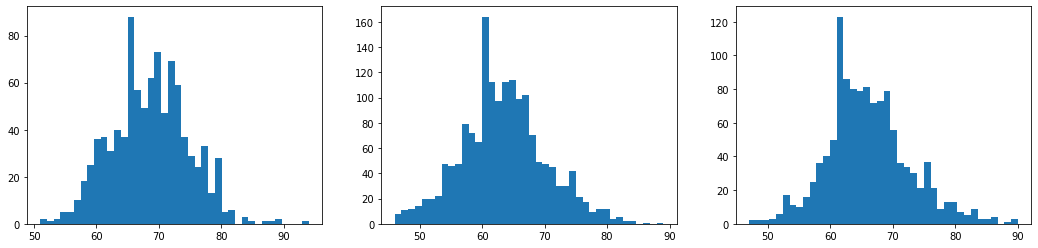

In [21]:
fig = plt.figure(figsize= (18,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132) 
ax3 = fig.add_subplot(133)   

ax1.hist(arg_n['Overall'], bins=40)
ax2.hist(eng_n['Overall'], bins=40)
ax3.hist(ger_n['Overall'], bins=40)
plt.plot()

Можем наблюдать отсутствие значительных выбросов - нас это устраивает.

[]

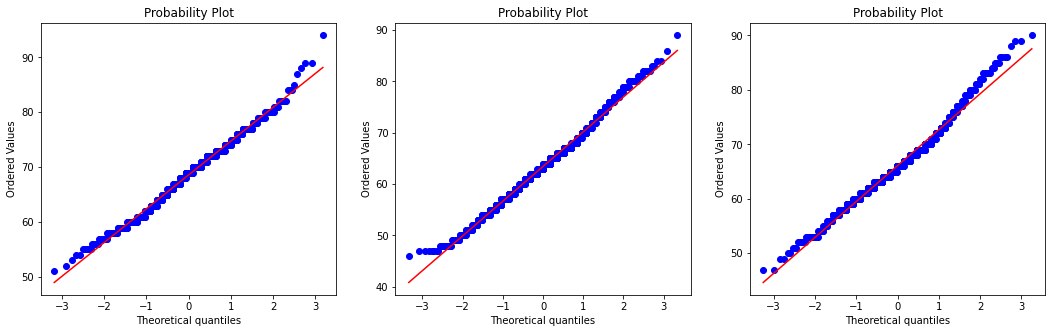

In [23]:
fig = plt.figure(figsize= (18,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132) 
ax3 = fig.add_subplot(133)   

stats.probplot(arg_n['Overall'], dist = "norm", plot = ax1)
stats.probplot(eng_n['Overall'], dist = "norm", plot = ax2)
stats.probplot(ger_n['Overall'], dist = "norm", plot = ax3)
plt.plot()

Графики гистограмм и квантиль-квантиль графики показывают, что наше распределение очень близко к нормальному - нас это также устраивает, несмотря на то, что по критерию Шапиро-Уилка при гипотезах и уровне значимости как в п. 1 нам следует отклонить гипотезу о нормальности выборок:

In [22]:
stats.shapiro(arg_n['Overall'])

ShapiroResult(statistic=0.9924899339675903, pvalue=0.00010995848424499854)

In [23]:
stats.shapiro(eng_n['Overall'])

ShapiroResult(statistic=0.9927869439125061, pvalue=2.9123211220394296e-07)

In [24]:
stats.shapiro(ger_n['Overall'])

ShapiroResult(statistic=0.9840749502182007, pvalue=3.5168692957832093e-10)

#### Проверим равенство дисперсий выборок

С теми же гипотезами и уровнем значимости как и в пунтке 1 воспользуемся критерием Левенье для проверки равенства дисперсий выборок:

In [40]:
stats.levene(arg_n['Overall'], eng_n['Overall'], ger_n['Overall'])

LeveneResult(statistic=2.5734315174476414, pvalue=0.07640649585695944)

Получили, что p-value=0.076>0.05=alpha, следовательно, нам следует принять нашу гипотезу о равенстве дисперсий.

#### Применение критерия

Тогда получается, что все требования для применения однофакторного дисперсионного анализа выполнены, поэтому воспользуемся:

In [41]:
stats.f_oneway(arg_n['Overall'], eng_n['Overall'], ger_n['Overall'])

F_onewayResult(statistic=188.45776131163214, pvalue=9.304102531320665e-79)

#### Статистический вывод

Т.к. полученное p-value<alpha, то нам следует отклонить гипотезу о равенстве среднего рейтинга игроков из Англии, Германии и Аргентины. С уверенности можно сделать статистический вывод, что проверяемая гипотеза верна на всей генеральной совокупности, то есть средние рейтинги игроков из Англии, Германии и Аргентины не равны.